<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/An_Analysis_On_Tweeter_Data_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re #re - A regular expression specifies a set of strings that matches it

# **Loading and checking Dataset**

In [38]:
inp_tweets0=pd.read_csv('raw_tweets_economy.txt',sep="\t")
inp_tweets0.head(20)

,Unnamed: 0,0
0,0,Stocks losses deepen as a key recession warnin...
1,1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,2,AP Explains: Is the US economy nearing a reces...
3,3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,4,Who will stop mr. Mario Draghi and the ECB wit...
5,5,Studying on Quizlet: The economy in Argentina\...
6,6,RT @RKrivoFX: U.S. #Futures Rebound on #Trade ...
7,7,RT @elerianm: Looking forward to discussing al...
8,8,@JohnJHarwood @reginaw50361 The #economy is li...
9,9,The #economy.\r\n@FoxNews @realDonaldTrump \r\...


# **Data Preprocessing**


**Deleting the extra column Unnamed: 0**

In [39]:
inp_tweets0.drop("Unnamed: 0", inplace=True, axis=1)

In [40]:
inp_tweets0.shape 

(500, 1)

In [41]:
inp_tweets0.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


**Renaming the column 0 as tweet**

In [42]:
inp_tweets0=inp_tweets0.rename({'0':'tweet'}, axis=1)
inp_tweets0.tail 

<bound method NDFrame.tail of                                                  tweet
0    Stocks losses deepen as a key recession warnin...
1    RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2    AP Explains: Is the US economy nearing a reces...
3    A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4    Who will stop mr. Mario Draghi and the ECB wit...
..                                                 ...
495  RT @michaeljohns: .@realDonaldTrump has transf...
496  RT @Emile1chedid: #Lebanon #Beirut #politics #...
497  RT @michaeljohns: .@realDonaldTrump has transf...
498  RT @farhadrahaei: RT.@HeshmatAlavi's #Facts #T...
499  #PrimeMinister @narendramodi commits to pumpin...

[500 rows x 1 columns]>

**Getting the tweets into a lists, for easy text cleanup and manipulation**

In [43]:
inp_tweets0.tweet.sample().values

array(['RT @tweetMalena: #TraitorTrump has taken our booming Obama #economy &amp; destroyed it via outrageous #deficits and #tradewars! This #TrumpSlum…'],
      dtype=object)

In [44]:
tweets0=inp_tweets0.tweet.values

**Showing the top 5 trending tweets tags**

In [45]:
tweets0[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

In [46]:
len(tweets0) 

500

## **Cleanup**

**The tweets contain**
* **URLs**
* **Hastags and at_the_rate** 
* **Retweet**
* **Upper Case and lower case**

Cleaning up the data by removing these



**Normalizing case**

We will convert to lower case

In [47]:
tweets_lower=[twt.lower() for twt in tweets0] #tweets_lower contains full dataset but in small letter

In [48]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

**Remove user handles begin with @**

In [49]:
import re #it is used to extract email, @, user handle etc at a very fast rate

In [50]:
#re. sub( ) - This function is used to substitute a substring with another substring
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai") #it is used for testing

' this course rocks! http://rahimbaig.com/ai'

In [51]:
tweets_nouser=[re.sub("@\w+","", tweet)    #removing @ from the tweet data
              for tweet in tweets_lower]

In [52]:
tweets_nouser[:5] #checking the dataset

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

In [53]:
len(tweets_nouser) 

500

**Remove URLs**

In [54]:
#re. sub( ) - This function is used to substitute a substring with another substring
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai") #it is used for testing

'@Rahim this course rocks! '

In [55]:
tweets_nourl=[re.sub("\w+://\S+","", twt)  #removing URLs from the tweet data
              for twt in tweets_nouser]

In [56]:
tweets_nourl[:5] #checking the dataset

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [57]:
tweets_nourl[-5:] #checking the dataset

['rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 'rt : #lebanon #beirut #politics #economy #commerce #funny #daily #media #crazy #science #food\r\n',
 'rt : . has transformed (and expanded) the republican party, making it the party of blue collar working america…',
 "rt : rt.'s #facts #thread\r\n1). blames u.s. sanctions for #iran’s crumbling #economy. #blacklistirgc #corrupti…",
 '#primeminister  commits to pumping 1.4$tr into the #economy of #india via #infrastructure projects .… ']

In [58]:
len(tweets_nourl)

500

## **Extracting only the #  from tweets**  - 
we want to analyse the most common in the tweets

In [59]:
#re.findall() - it scans string from left to right, searching for all non-overlapping matches of the pattern .
re.findall("#\w+", "I love this #love #life and fun") #Return a list of all non-overlapping matches in the string

['#love', '#life']

In [60]:
re.findall("#\w+","@Rahim #food is #love")#it is used for testing

['#food', '#love']

In [61]:
hastags0 = [re.findall('#\w+', twt) for twt in tweets_nourl] 

In [62]:
hastags0[:5]#checking the dataset

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 []]

**Finding out the most common hastags and plotting them**

First combining all the individual lists into a single 

In [63]:
all_hastags =[] 

In [64]:
for twt in hastags0:
  all_hastags.extend(twt) #appending all the word which contains hastags into a list named all hastags

In [65]:
all_hastags[:25]

['#economy',
 '#fail',
 '#collapse',
 '#recession',
 '#gop',
 '#greed',
 '#economy',
 '#trump',
 '#maga',
 '#trumptrain2020',
 '#sheeple',
 '#farming',
 '#trad',
 '#business',
 '#economy',
 '#recession',
 '#tradewar',
 '#china',
 '#eu',
 '#economy',
 '#economy',
 '#learnenglish',
 '#businessenglish',
 '#futures',
 '#trade']

In [66]:
len(all_hastags)

1061

Removing #economy from the data as this is what mpost of the tweets are about

In [67]:
stop_contextual='#economy'

Removing the contextual stopwords

In [68]:
all_hastags=[tag for tag in all_hastags if tag not in stop_contextual]

In [69]:
len(all_hastags)

813

**Using a counter to get the top hashtags**

In [70]:
from collections import Counter
#Counter is a sub-class of collections that is used to count hashable objects. It implicitly creates a hash table of an iterable when invoked.


In [71]:
counts_hashtags = Counter (all_hastags) #counting the freq of the word containg hashtags

In [72]:
counts_hashtags.most_common(10) #showing the top 10 trending hastags 

[('#recession', 24),
 ('#india', 20),
 ('#business', 18),
 ('#hongkong', 17),
 ('#bloomberg', 15),
 ('#china', 12),
 ('#trump', 10),
 ('#markets', 9),
 ('#economics', 9),
 ('#infrastructure', 9)]

# **Plotting the top 10 trending hastags**

In [73]:
res= counts_hashtags.most_common(10)

In [74]:
#creating a dictionary which contains hastag consisting words as values and there frequency as values
res2 = {term:cnt for term, cnt in res} 

In [75]:
list(res2.keys()) #showing the keys of res2 dictionary

['#recession',
 '#india',
 '#business',
 '#hongkong',
 '#bloomberg',
 '#china',
 '#trump',
 '#markets',
 '#economics',
 '#infrastructure']

In [76]:
list(res2.values()) #showing the values of res2 dictionary

[24, 20, 18, 17, 15, 12, 10, 9, 9, 9]

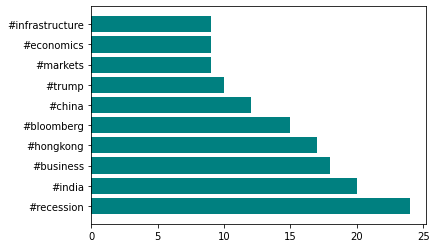

In [77]:
plt.barh(list(res2.keys()),list(res2.values()), color='teal' )
plt.show()